In [28]:
#importing yfinance api and pandas
import pandas as pd
import yfinance as yf
import datetime as datetime
#fetching data from S&P 500 index using yfinance api
sp500_df = yf.download('^GSPC', start = datetime.datetime(2010, 1, 1), end = datetime.datetime(2019, 12, 31))

[*********************100%%**********************]  1 of 1 completed


In [29]:
#more libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow import keras

In [30]:
#and... more libraries!
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.dates as mdates

In [31]:
#making changes to the dataset
sp500_df = sp500_df.drop(['Open', 'High', 'Low', 'Volume'], axis=1)
sp500_df["Date"] = sp500_df.index
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df.head()

,Close,Adj Close,Date
Date,,,
2010-01-04,1132.989990,1132.989990,2010-01-04
2010-01-05,1136.520020,1136.520020,2010-01-05
2010-01-06,1137.140015,1137.140015,2010-01-06
2010-01-07,1141.689941,1141.689941,2010-01-07
2010-01-08,1144.979980,1144.979980,2010-01-08


In [32]:
#creating test and train datasets
train_df, test_df = sp500_df.loc[(sp500_df['Date'] <= '2018-12-31')], sp500_df.loc[(sp500_df['Date'] > '2018-12-31')]
#the complete year 2019 is used for testing
train = train_df['Adj Close'].values
test = test_df['Adj Close'].values

In [33]:
#feature scaling
training_values = np.reshape(train,(len(train),1))
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)
#assigning training values
x_train = training_values[0:len(training_values)-1]
y_train = training_values[1:len(training_values)]
x_train = np.reshape(x_train,(len(x_train),1,1))

In [34]:
#creating model architecture
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(None,1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
#compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [35]:
#training the model
model.fit(x_train,y_train,epochs=25,batch_size=8)

Epoch 1/25
283/283 [==============================] - 2s 1ms/step - loss: 0.0190
Epoch 2/25
283/283 [==============================] - 0s 1ms/step - loss: 1.4313e-04
Epoch 3/25
283/283 [==============================] - 0s 1ms/step - loss: 9.5496e-05
Epoch 4/25
283/283 [==============================] - 0s 1ms/step - loss: 9.9931e-05
Epoch 5/25
283/283 [==============================] - 0s 1ms/step - loss: 9.5774e-05
Epoch 6/25
283/283 [==============================] - 0s 1ms/step - loss: 9.8078e-05
Epoch 7/25
283/283 [==============================] - 0s 1ms/step - loss: 1.1076e-04
Epoch 8/25
283/283 [==============================] - 0s 1ms/step - loss: 9.8100e-05
Epoch 9/25
283/283 [==============================] - 0s 1ms/step - loss: 1.1066e-04
Epoch 10/25
283/283 [==============================] - 0s 1ms/step - loss: 1.0918e-04
Epoch 11/25
283/283 [==============================] - 0s 1ms/step - loss: 1.3381e-04
Epoch 12/25
283/283 [==============================] - 0s 1ms/step 

In [36]:
#converting back predicted and scaled value
test_values = np.reshape(test, (len(test), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = scaler.inverse_transform(predicted_price)
predicted_price=np.squeeze(predicted_price)

8/8 [==============================] - 0s 1ms/step


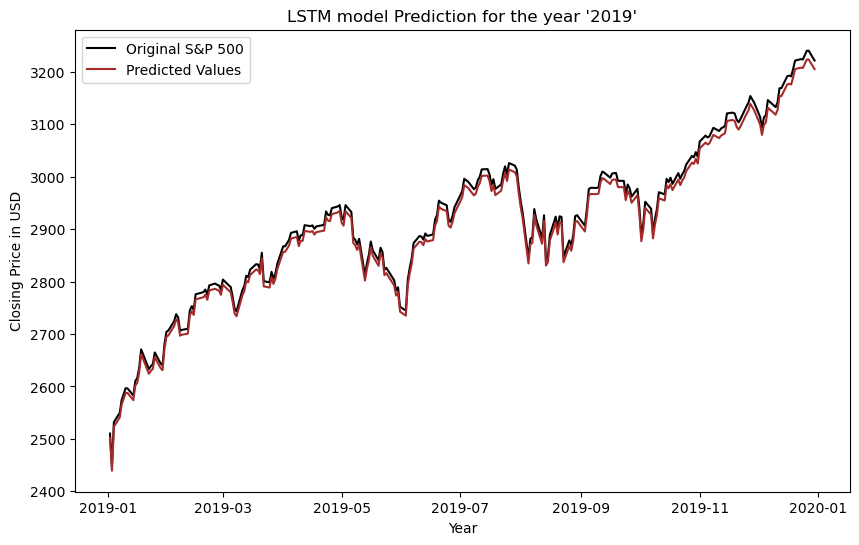

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(test_df.Date, test_df['Adj Close'], color= 'black', label='Original S&P 500')
plt.plot(test_df.Date, predicted_price, color= 'brown', label='Predicted Values')
plt.title("LSTM model Prediction for the year '2019'")
plt.xlabel('Year')
plt.ylabel('Closing Price in USD')
plt.legend()
plt.show()

In [38]:
#model validation
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_squared_error(test_df['Adj Close'], predicted_price)
rmse = np.sqrt(mean_squared_error(test_df['Adj Close'], predicted_price))
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 131.6075749974327
Root Mean Squared Error: 11.472034475080376
